In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Information on the Diamond Dataset

- **price**: Price in dollars. Data were collected in 2008.
- **carat**: Diamond weight. 1 carat is equal to 0.2 grams.
- **cut**: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- **color**: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- **clarity**: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- **x, y, z**: Diamond length, width, and depth, respectively, in mm.
- **table**: Ratio of the width of the top face of diamond to its overall width, as a percentage.
- **depth**: Proportional depth of the diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

In [2]:
df_diamonds = pd.read_csv("diamonds.csv")
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


> To improve the understanding, the fields `x,y,z` will be renamed by they real meaning

In [3]:
df_diamonds.rename(columns={'x': 'l', 'y': 'w', 'z': 'd'}, inplace = True)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,l,w,d
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   l        53940 non-null  float64
 8   w        53940 non-null  float64
 9   d        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
# Selecting the Numeric Columns
num_cols = df_diamonds.select_dtypes(include = np.number).columns.to_list()
num_cols

['carat', 'depth', 'table', 'price', 'l', 'w', 'd']

In [6]:
# Selecting the non Numeric Columns
no_num_cols =  df_diamonds.columns.difference(num_cols).to_list()
no_num_cols

['clarity', 'color', 'cut']

In [7]:
df_diamonds[num_cols].describe()

,carat,depth,table,price,l,w,d
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
for col in no_num_cols:
    print(col, 'values:', df_diamonds[col].unique())

clarity values: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
color values: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
cut values: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


> According to the description text, the non numerical variables follow an ordered sequence.<br>
> Therefore, to improve the chart quality these variables types will be changed to categorical ones with the order defined in the description.


In [9]:
cat_ordered = {"clarity": ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
              'cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
              'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'] }

In [10]:
for key in cat_ordered:
    ordered_key = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = cat_ordered[key])
    df_diamonds[key] = df_diamonds[key].astype(ordered_key)

In [11]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   l        53940 non-null  float64 
 8   w        53940 non-null  float64 
 9   d        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


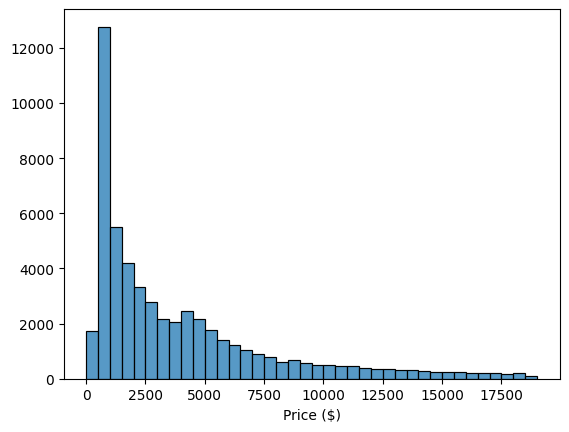

In [12]:
bin_size = 500
bins = np.arange(0, df_diamonds['price'].max()+bin_size,bin_size)
plt.Figure(figsize=(12,10))
sb.histplot(data = df_diamonds,x = 'price', bins=bins);
plt.xlabel("Price ($)")
plt.ylabel("");

> Because the long tail, the price column will be switched to log scale.<>
> But first, let's check about the log values and apply the same proportion as in the decimal scale

In [13]:
df = df_diamonds[["price"]].copy()
df['price_log'] = df.apply(lambda x: np.log10(x['price']), axis = 1)
df.describe()

,price,price_log
count,53940.000000,53940.000000
mean,3932.799722,3.381751
std,3989.439738,0.440657
min,326.000000,2.513218
25%,950.000000,2.977724
50%,2401.000000,3.380392
75%,5324.250000,3.726258
max,18823.000000,4.274689


> So, following the same princicple as in the decimal scale, we will use the binsize of ~1/8 of the std deviation and the start value as the min value -10% 

In [14]:
log_binsize = (df["price_log"].std()/8).round(3)
min_log_bin = (df["price_log"].min()*.9).round(1)
log_binsize, min_log_bin

(0.055, 2.3)

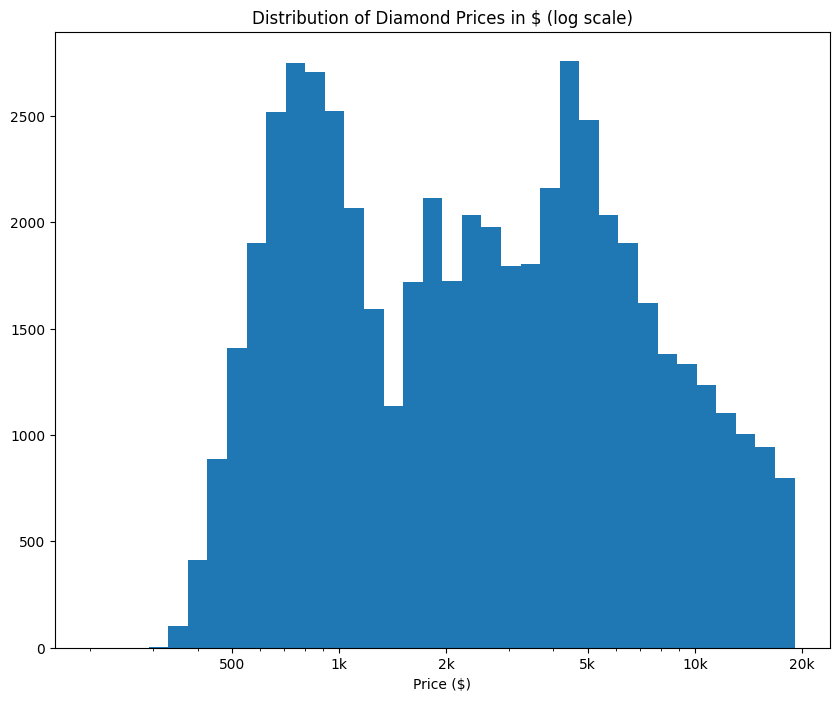

In [15]:
bin_size = log_binsize
bins = 10**(np.arange(min_log_bin, np.log10(df_diamonds['price'].max())+bin_size,bin_size))
plt.figure(figsize=(10,8))
plt.hist(data = df_diamonds,x = 'price', bins=bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4],[500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel("Price ($)")
plt.title("Distribution of Diamond Prices in $ (log scale)")
plt.ylabel("");

> Price has a long-tailed distribution, with a lot of diamonds on the low price end, and few on the high price end. When plotted on a log-scale, the price distribution looks roughly bimodal, with one peak between 500 and 1000, and a second peak a little below 5000. Interestingly, there's a steep jump in frequency right before 2000, rather than a smooth ramp up.

### Let's Check for `carat`

In [16]:
df_diamonds.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [17]:
bin_size = (df_diamonds.carat.std()/8).round(3)
min_bin = 0
bin_size, min_bin

(0.059, 0)

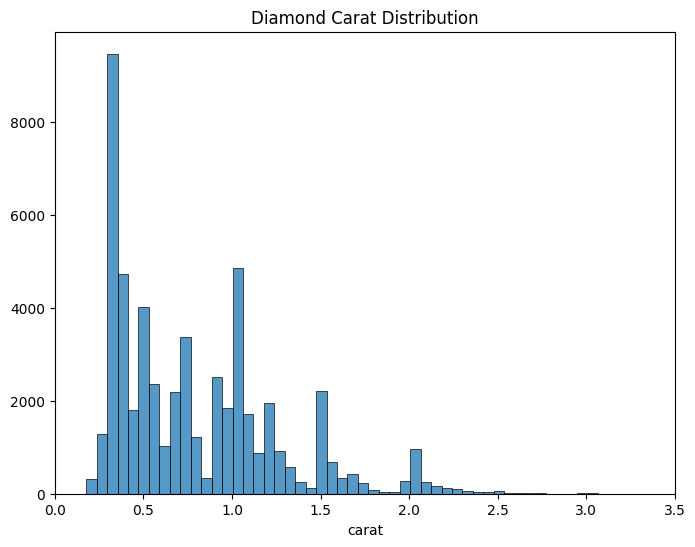

In [18]:
bins = np.arange(min_bin, df_diamonds['carat'].max()+bin_size,bin_size)
plt.figure(figsize=(8,6))
sb.histplot(data = df_diamonds,x = 'carat', bins=bins)
plt.xlim([0,3.5]) # cutting on this value to remove outliers
plt.xlabel("carat")
plt.title("Diamond Carat Distribution")
plt.ylabel("");

> We will zoom in in the region that seems to have more relevant data.(carat between 0.2 and 1.5). Also, the bin size will be reduced to enhance the chart

In [19]:
bin_size = 0.01
min_bin = 0.2
bin_size, min_bin

(0.01, 0.2)

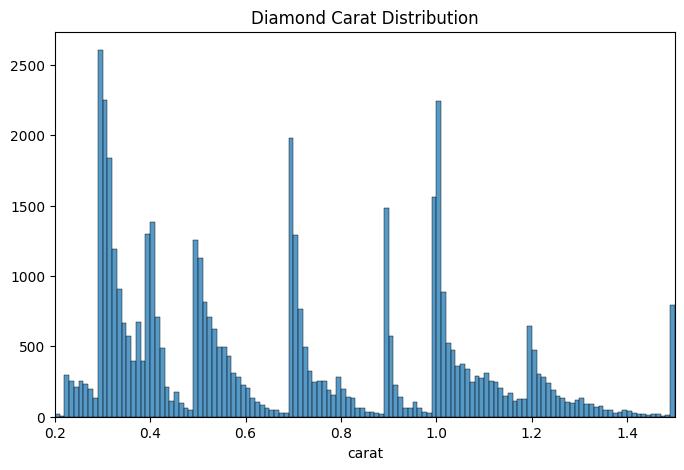

In [20]:
bins = np.arange(min_bin,1.51,bin_size)
plt.figure(figsize=(8,5))
sb.histplot(data = df_diamonds,x = 'carat', bins=bins)
plt.xlim([0.2,1.5]) # cutting on this value to remove outliers
plt.xlabel("carat")
plt.title("Diamond Carat Distribution")
plt.ylabel("");

> It seems to show a pattern at 0.3, 0.5, 0.7 and 1.0. Possibly a standard market size

In [21]:
bar_colors = sb.color_palette()[0]

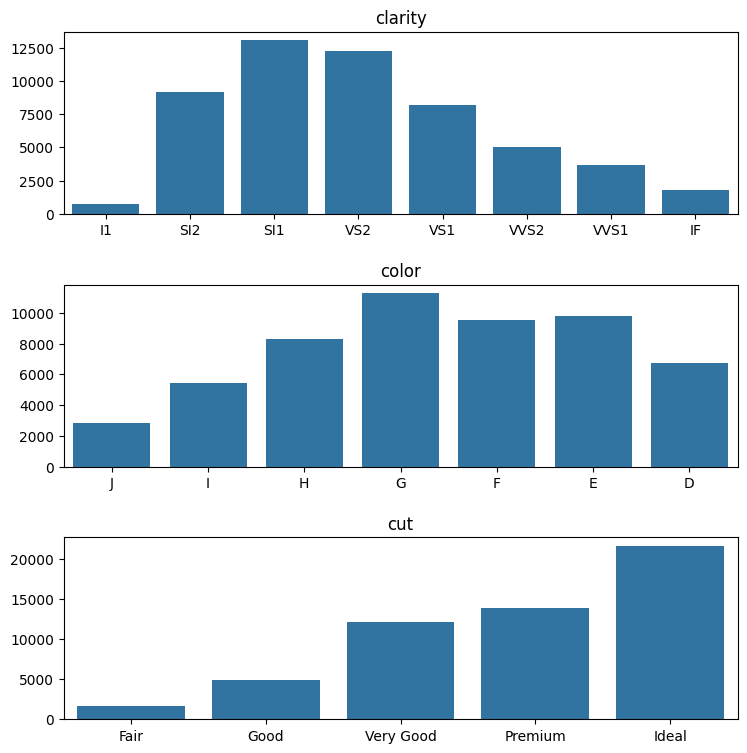

In [22]:
fig, ax = plt.subplots(nrows = len(no_num_cols), figsize = [8,8])
fig.tight_layout(pad = 3)
for i, j  in enumerate(no_num_cols):
    sb.countplot(data = df_diamonds, x = j, color = bar_colors, ax=ax[i])
    ax[i].title.set_text(j)
    ax[i].set(xlabel = None)
    ax[i].set(ylabel = None)   

The cut quality of the diamonds in the dataset is generally quite good, with most of them in the Premium or Ideal level. Most of the diamonds are also of color quality G or better. Clarity, shows a trend opposite from the other two features, with most of the diamonds on the lower end of the scale, at VS2 or worse. Clarity grades become rarer as steps are taken up the scale.

I'll now look at the other features in the data to see if any of them hold interesting properties.

### Checking the Diamonds Dimensions

In [23]:
dia_dim = list(df_diamonds.columns[-3:])
dia_dim

['l', 'w', 'd']

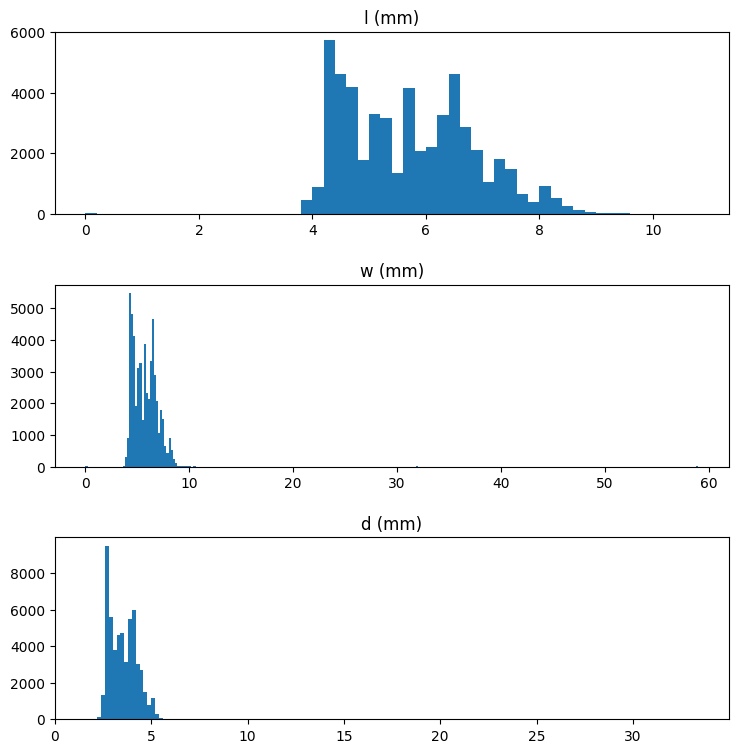

In [24]:
fig2, ax2 = plt.subplots(nrows = len(dia_dim), figsize = [8,8])
fig2.tight_layout(pad = 3)
for i, j  in enumerate(dia_dim):
    bins = np.arange(df_diamonds[j].min(),df_diamonds[j].max()+0.2,0.2)
    ax2[i].hist(data = df_diamonds, x = j, bins = bins)
    plt.xlim([df_diamonds[j].min(),df_diamonds[j].max()*1.1])
    ax2[i].title.set_text(f"{j} (mm)")
    ax2[i].set(xlabel = None)
    ax2[i].set(ylabel = None)

> There are some interesting outliers.<br>
> For instance, how can a diamond have a dimension equals to '0'?<br>
> Let's highlight these outliers trying to cut on the values that we can visually see on the chart as outliers

### Checking the outliers

In [26]:
df_diamonds[dia_dim].describe()

,l,w,d
count,53940.000000,53940.000000,53940.000000
mean,5.731157,5.734526,3.538734
std,1.121761,1.142135,0.705699
min,0.000000,0.000000,0.000000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.740000,58.900000,31.800000


#### Lower Outliers

In [35]:
df_low_outlier = df_diamonds.query("l <= 3.5 | w <= 3.5 |  d <= 2")
df_low_outlier

,carat,cut,color,clarity,depth,table,price,l,w,d
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00
14635,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00


In [36]:
df_low_outlier.shape

(23, 10)

> Most of the records show one of the dimensions as `0`. This is physically impossible.<br>
> In those cases that all the dimensions are greater than 0, the dimention `d` is exactly equal to the `carat`

#### Higher Outliers

In [39]:
df_high_outlier = df_diamonds.query("w > 10 | d>6")

In [40]:
df_high_outlier.shape

(15, 10)

In [41]:
df_high_outlier

,carat,cut,color,clarity,depth,table,price,l,w,d
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26194,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16
26431,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43


> Visually it is not possible to notice an alarming dimension.<br>
> One guess is to recalculate the `depth` from the dimensions that results in its value. I other words:<br> 
<font color = 'red'> $${depth} = 2\frac{d}{(l+w)}  $$ 

In [42]:
df_diamonds_recalc = df_diamonds.copy()

In [55]:
df_diamonds_recalc["depth_recalc"] = (2*(df_diamonds_recalc["d"]/(df_diamonds_recalc["l"]+df_diamonds_recalc["w"]))*100).round(1)

> As a starter point, I will consider anything above or below 10% of difference between calculated field and original field as an outlier, besides the records where l, w, or d are 0<br>
> Thus, once identified, these records will be removed from the dataset.

In [75]:
df_outliers = df_diamonds_recalc.query("(depth/depth_recalc)>1.1 | (depth/depth_recalc)<0.9 | l ==0 | d == 0 | w == 0")
df_outliers

,carat,cut,color,clarity,depth,table,price,l,w,d,depth_recalc
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00,0.0
2941,1.00,Very Good,J,SI2,62.8,63.0,3293,6.26,6.19,3.19,51.2
4518,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97,63.1
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00,0.0
6341,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12,65.7
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00,0.0
10377,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12,63.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00,0.0


In [76]:
df_outliers.shape

(43, 11)

> In total, 43 records will be removed from the dataset

In [77]:
df_outliers.index

Int64Index([ 2207,  2314,  2941,  4518,  4791,  5471,  6341, 10167, 10377,
            11182, 11963, 13601, 14635, 15235, 15951, 17593, 19502, 20694,
            21654, 24067, 24394, 24520, 25849, 26123, 26194, 26243, 26495,
            27112, 27429, 27503, 27739, 33102, 34282, 38734, 39246, 47138,
            48410, 49189, 49556, 49557, 49875, 49905, 51506],
           dtype='int64')

In [78]:
df_diamonds_filtered = df_diamonds_recalc.copy()
df_diamonds_filtered.shape

(53940, 11)

In [79]:
df_diamonds_filtered = df_diamonds_filtered[~df_diamonds_filtered.index.isin(df_outliers.index)]

In [80]:
df_diamonds_filtered.shape

(53897, 11)

#### Reploting after the outliers removal

In [82]:
df_diamonds_filtered["depth"] = df_diamonds_filtered["depth_recalc"]
df_diamonds_filtered.drop(columns = ["depth_recalc"], inplace = True)
df_diamonds_filtered.head()

,carat,cut,color,clarity,depth,table,price,l,w,d
0,0.23,Ideal,E,SI2,61.3,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


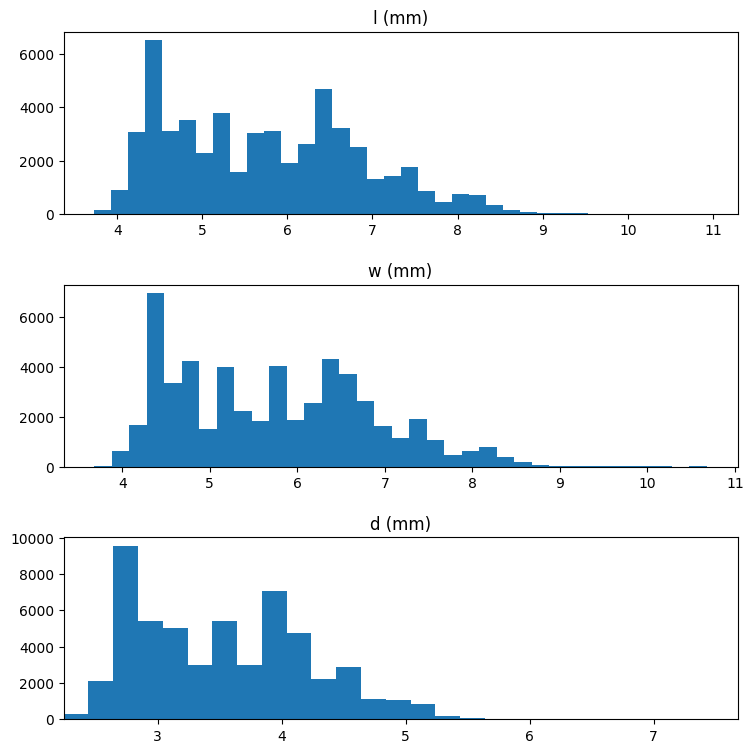

In [83]:
fig3, ax3 = plt.subplots(nrows = len(dia_dim), figsize = [8,8])
fig3.tight_layout(pad = 3)
for i, j  in enumerate(dia_dim):
    bins = np.arange(df_diamonds_filtered[j].min(),df_diamonds_filtered[j].max()+0.2,0.2)
    ax3[i].hist(data = df_diamonds_filtered, x = j, bins = bins)
    plt.xlim([df_diamonds_filtered[j].min(),df_diamonds_filtered[j].max()*1.1])
    ax3[i].title.set_text(f"{j} (mm)")
    ax3[i].set(xlabel = None)
    ax3[i].set(ylabel = None)

> Comparing the histograms, it is possible to notice that the length and the width are similar, while the depth (not the calculated one) is different.<br>
> This is acceptable because if we figure an image of a diamond, it looks like a square shape with an enlongated tail.<br>
> One conclusion is that there is a correlation between the first two dimensions

#### Checking for `Table` and `Depth`

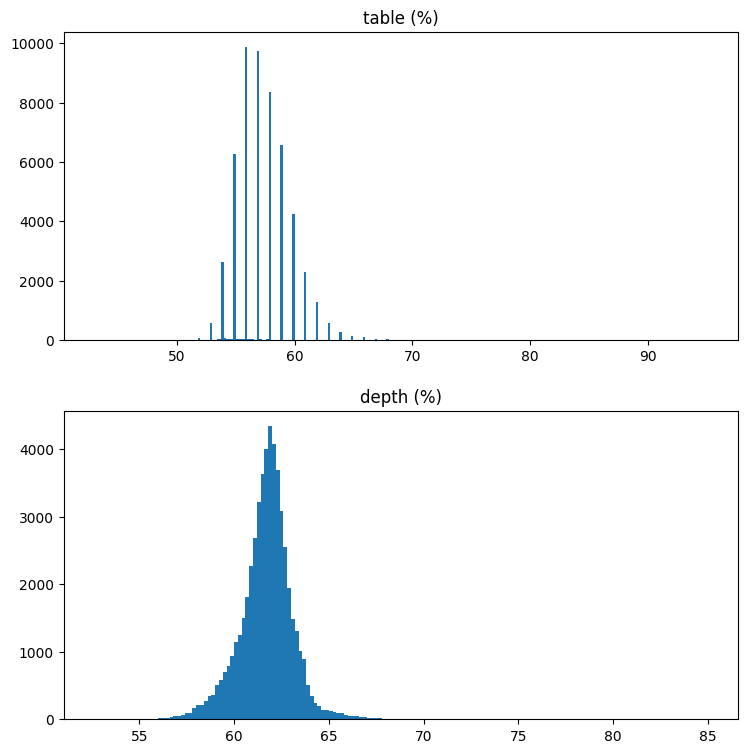

In [89]:
fig4, ax4 = plt.subplots(nrows = 2, figsize = [8,8])
fig4.tight_layout(pad = 3)
for i, j  in enumerate(["table", "depth"]):
    bins = np.arange(df_diamonds_filtered[j].min(),df_diamonds_filtered[j].max()+0.2,0.2)
    ax4[i].hist(data = df_diamonds_filtered, x = j, bins = bins)
    plt.xlim([df_diamonds_filtered[j].min(),df_diamonds_filtered[j].max()*1.1])
    ax4[i].title.set_text(f"{j} (%)")
    ax4[i].set(xlabel = None)
    ax4[i].set(ylabel = None)

> It's interesting to notice that both measures are quite normally distributed.<br>
> Except for the tabe, which appears to be quite discrete. This can lead to a suggestion market standard proportions.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The price variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between $500 and $1000, and another just below $5000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
When investigating the x, y, and z size variables, a number of outlier points were identified. Overall, these points can be characterized by an inconsistency between the recorded value of depth, and the value that would be derived from using x, y, and z. For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

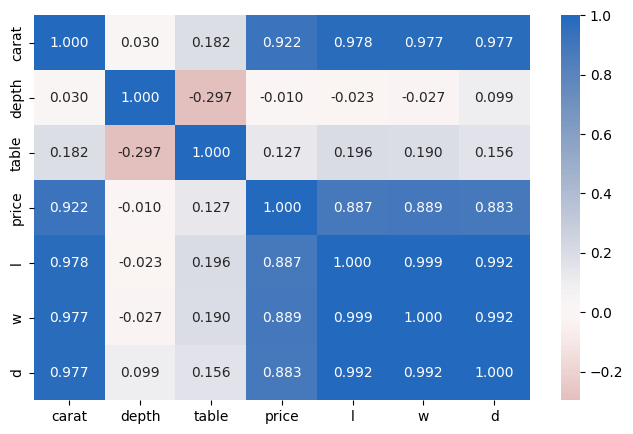

In [110]:
plt.figure(figsize=[8,5])
sb.heatmap(df_diamonds_filtered[num_cols].corr(), annot=True, fmt = '.3f', cmap='vlag_r', center = 0)

plt.show()

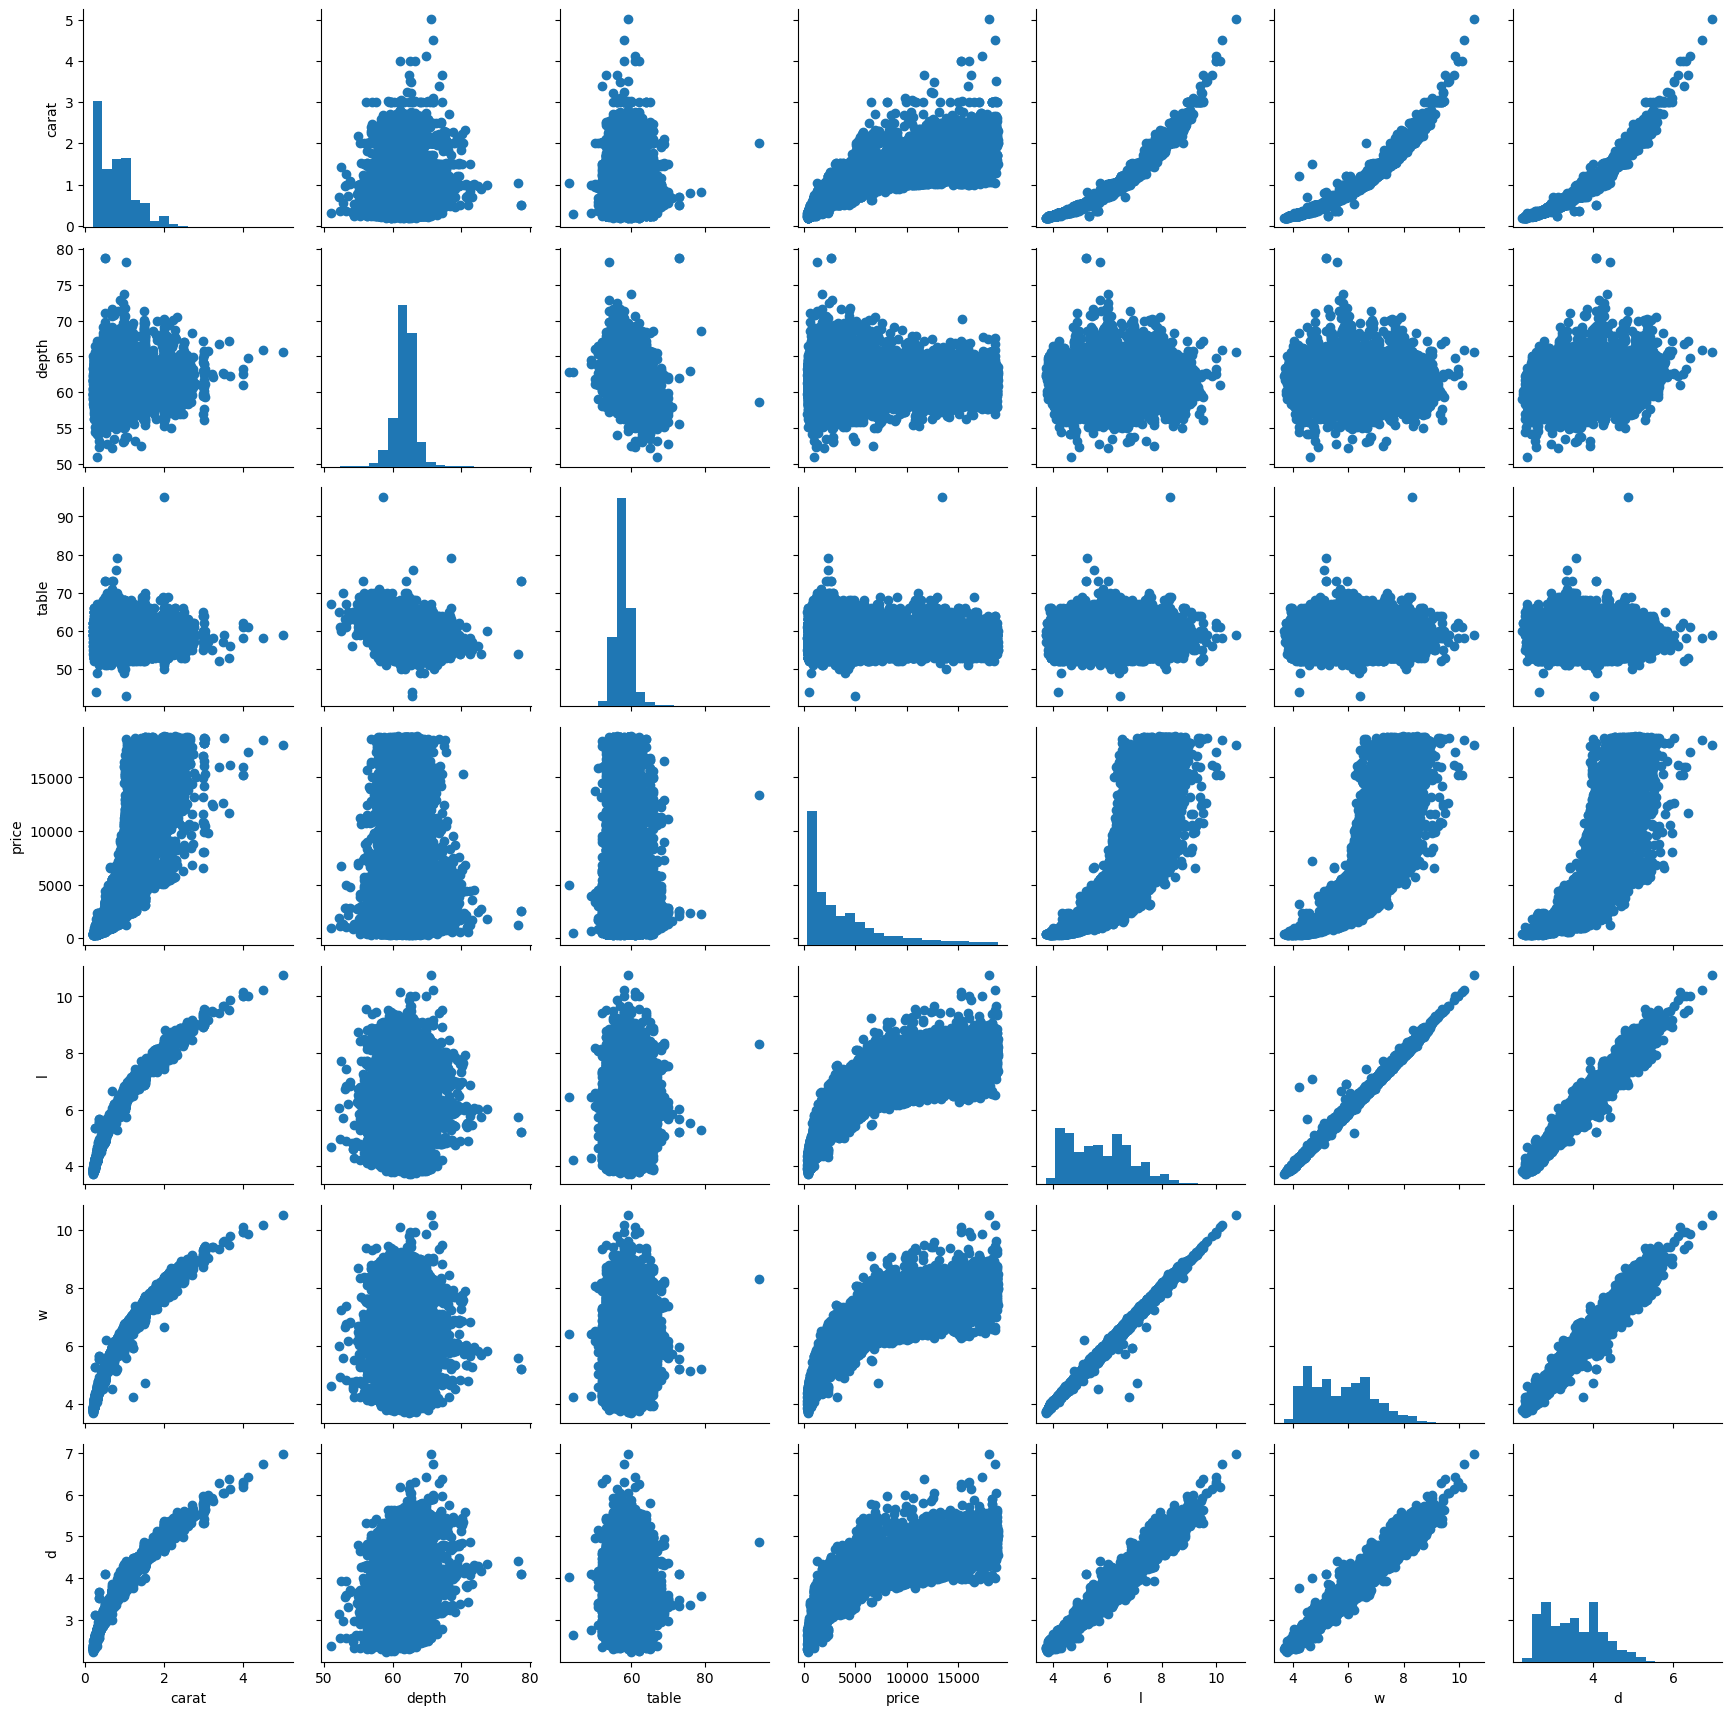

In [111]:
g = sb.PairGrid(data = df_diamonds_filtered, vars = num_cols)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)

As expected, the 'x', 'y', and 'z' dimensions are all highly correlated with one another, and all of them are also highly correlated with carat. Since carat is a measure of diamond size, it's not too surprising that the overall trend between carat and the three individual dimensions appears polynomial. In addition, since all the diamonds are round-cut, it makes sense that the 'x', 'y', and 'z' sizes would all move proportionally together.

Surprisingly, the correlation coefficient between price and carat is very high, despite the fact that price has such a large range of values. This will be worth extra exploration in this section. Depth and table don't have strong correlations with any other numeric variables in the dataset, and we see the moderate negative correlation hypothesized in the previous section. I won't perform any further analyses with these variables since they don't look like they'll be of much further interest.

Let's move on to looking at how price and carat weight correlate with the categorical variables.

<Figure size 1000x1000 with 0 Axes>

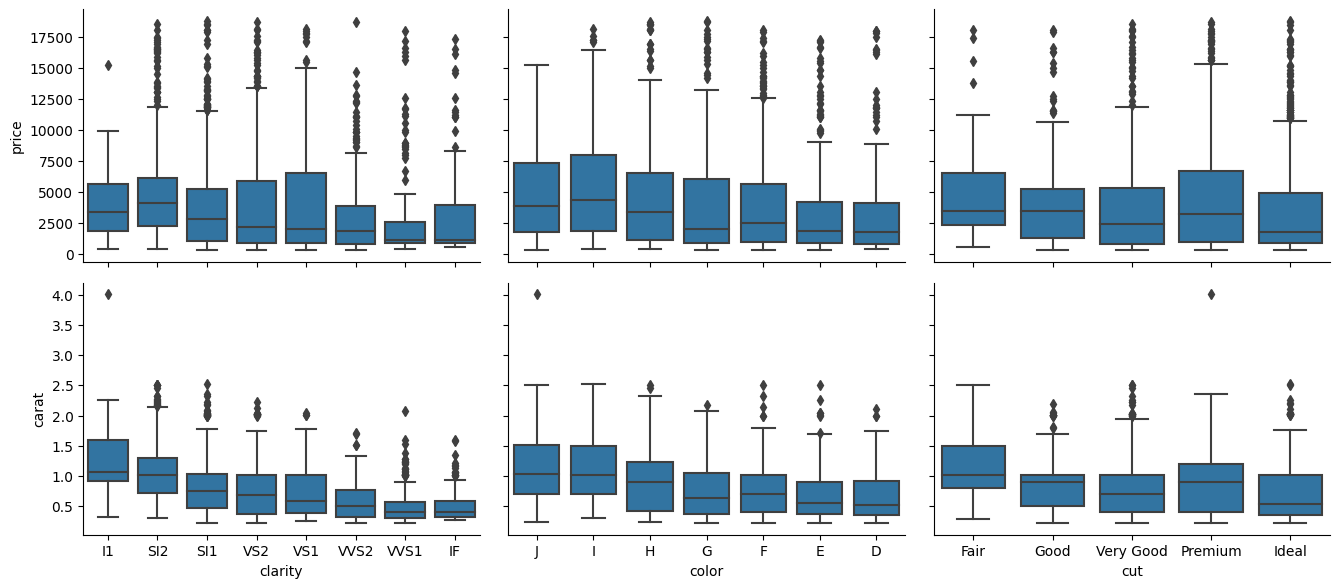

In [136]:
diamonds_samp = df_diamonds_filtered.sample(2000)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = ['price', 'carat'], x_vars = no_num_cols,
                height = 3, aspect = 1.5)
g.map(boxgrid);
#plt.show();

Interestingly, it appears that there are some negative relationships between the categorical variables and the two numeric variables of interest. The diamonds with the best features (Ideal cut, color D, clarity IF) seem to get the lowest prices, but also tend to be smaller on average. This will be worth investigating more later on, using the full data.

Finally, let's look at relationships between the three categorical features.

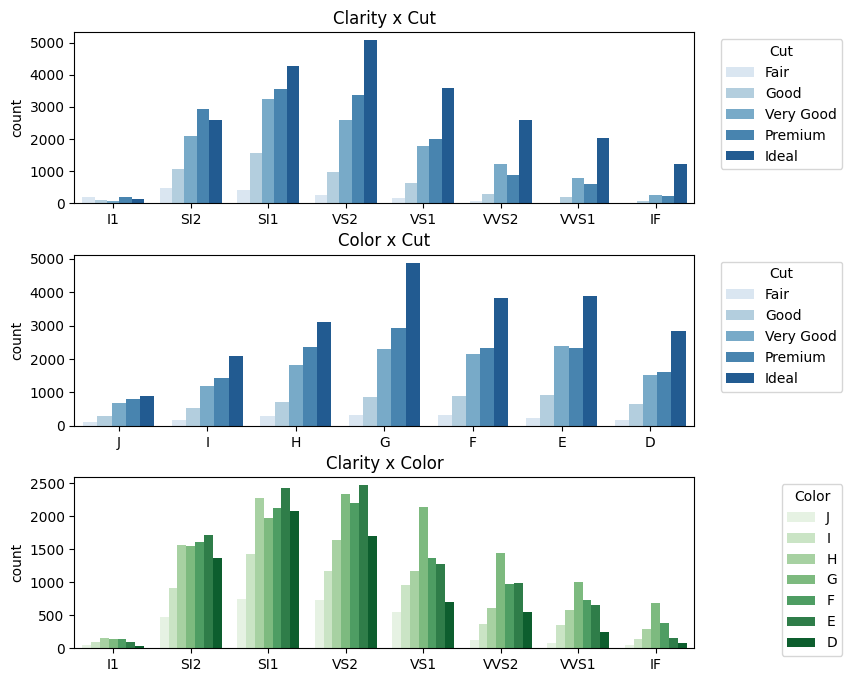

In [169]:
plt.figure(figsize=(8,8))


plt.subplot(3,1,1)

sb.countplot(data = df_diamonds_filtered, x = 'clarity', hue = 'cut', palette = 'Blues')
plt.title("Clarity x Cut")
plt.xlabel(None)
#plt.ylabel(None)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1), title = "Cut")

plt.subplot(3,1,2)

sb.countplot(data = df_diamonds_filtered, x = 'color', hue = 'cut', palette = 'Blues')
plt.title("Color x Cut")
plt.xlabel(None)
#plt.ylabel(None)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1), title = 'Cut')

plt.subplot(3,1,3)

sb.countplot(data = df_diamonds_filtered, x = 'clarity', hue = 'color', palette = 'Greens')
plt.title("Clarity x Color")
plt.xlabel(None)
#plt.ylabel(None)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.25,1), title = "Color")
plt.subplots_adjust(hspace = 0.3)

There doesn't seem to be that much interaction between diamond color and cut, though proportionally it seems like there might be more "Very Good" and "Premium" diamonds on the better color grades (F, E, and D). There are slightly larger interactions on the clarity grades, especially the lower levels of SI2, SI1, and VS2. It looks like there are more Very Good and Premium cut diamonds and more G, F, and E color diamonds compared to higher clarity grades.

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how price and carat are related to one another for all of the data, and to plot price on a log scale.

In [172]:
k = df_diamonds.copy()
k

,carat,cut,color,clarity,depth,table,price,l,w,d
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
